In [3]:
a=5
a

5

In [2]:
import pandas as pd 
import numpy as np 
import tensorflow as tf

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split 

from tensorflow.keras.utils import to_categorical 

from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

from tensorflow.keras.optimizers import Adam


In [3]:
dataset=pd.read_csv("fer2013.csv")
dataset

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


C:\Users\Mahika\AppData\Local\Temp\ipykernel_11080\870180081.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)


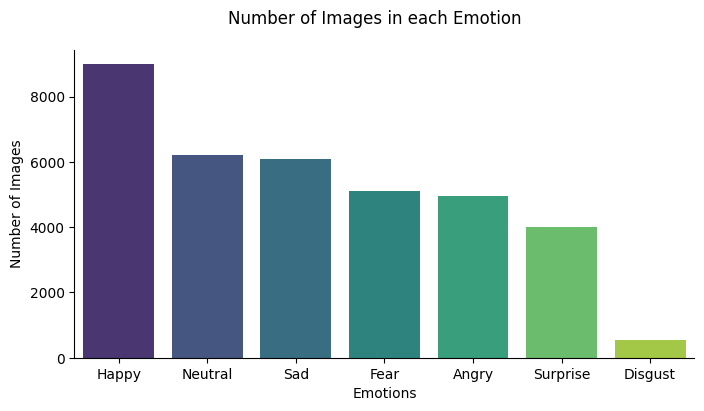

In [4]:
#Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_mapping = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# We  have the emotion_mapping dictionary
emotion_counts = dataset.emotion.value_counts()

# Access emotion counts with corresponding names
emotion_name = [emotion_mapping[label] for label in emotion_counts.index]
emotion_count = [count for count in emotion_counts.values]

# Create a bar plot using Matplotlib & Seaborn
fig, ax = plt.subplots(1,1,figsize=(8,4))
#sns.barplot(x=data.emotion.value_counts().keys() ,y=data.emotion.value_counts().values,palette="viridis",ax=ax)
sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)
plt.xlabel("Emotions")
plt.ylabel("Number of Images")
ax.spines['top'].set_visible(False) # it will remove the top boundry line
ax.spines['right'].set_visible(False) # it will remove the right boundry line
fig.suptitle("Number of Images in each Emotion")
plt.show()

In [5]:
Classes=dataset["emotion"]
Classes

0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

In [6]:
pixels = dataset["pixels"]

# Split the strings into lists of integers
pixels = pixels.apply(lambda x: np.fromstring(x, sep=' ', dtype=np.uint8))

# Convert the list of arrays into a 2D NumPy array of shape (35000, 48*48)
pixels = np.stack(pixels.values)

# Reshape into (35000, 48, 48) for image representation
pixels = pixels.reshape(-1, 48, 48)

In [7]:

pixels


array([[[ 70,  80,  82, ...,  52,  43,  41],
        [ 65,  61,  58, ...,  56,  52,  44],
        [ 50,  43,  54, ...,  49,  56,  47],
        ...,
        [ 91,  65,  42, ...,  72,  56,  43],
        [ 77,  82,  79, ..., 105,  70,  46],
        [ 77,  72,  84, ..., 106, 109,  82]],

       [[151, 150, 147, ..., 129, 140, 120],
        [151, 149, 149, ..., 122, 141, 137],
        [151, 151, 156, ..., 109, 123, 146],
        ...,
        [188, 188, 121, ..., 185, 185, 186],
        [188, 187, 196, ..., 186, 182, 187],
        [186, 184, 185, ..., 193, 183, 184]],

       [[231, 212, 156, ...,  44,  27,  16],
        [229, 175, 148, ...,  27,  35,  27],
        [214, 156, 157, ...,  28,  22,  28],
        ...,
        [241, 245, 250, ...,  57, 101, 146],
        [246, 250, 252, ...,  78, 105, 162],
        [250, 251, 250, ...,  88, 110, 152]],

       ...,

       [[ 17,  17,  16, ...,  83, 114, 245],
        [ 18,  17,  16, ..., 104, 136, 253],
        [ 19,  16,  17, ..., 128, 152, 255

In [8]:
pixels=pixels/255
pixels

array([[[0.2745098 , 0.31372549, 0.32156863, ..., 0.20392157,
         0.16862745, 0.16078431],
        [0.25490196, 0.23921569, 0.22745098, ..., 0.21960784,
         0.20392157, 0.17254902],
        [0.19607843, 0.16862745, 0.21176471, ..., 0.19215686,
         0.21960784, 0.18431373],
        ...,
        [0.35686275, 0.25490196, 0.16470588, ..., 0.28235294,
         0.21960784, 0.16862745],
        [0.30196078, 0.32156863, 0.30980392, ..., 0.41176471,
         0.2745098 , 0.18039216],
        [0.30196078, 0.28235294, 0.32941176, ..., 0.41568627,
         0.42745098, 0.32156863]],

       [[0.59215686, 0.58823529, 0.57647059, ..., 0.50588235,
         0.54901961, 0.47058824],
        [0.59215686, 0.58431373, 0.58431373, ..., 0.47843137,
         0.55294118, 0.5372549 ],
        [0.59215686, 0.59215686, 0.61176471, ..., 0.42745098,
         0.48235294, 0.57254902],
        ...,
        [0.7372549 , 0.7372549 , 0.4745098 , ..., 0.7254902 ,
         0.7254902 , 0.72941176],
        [0.7

In [9]:
pixels=pixels.reshape(-1,48,48,1)
pixels.shape

(35887, 48, 48, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(pixels, Classes, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [11]:
X_train.shape

(29068, 48, 48, 1)

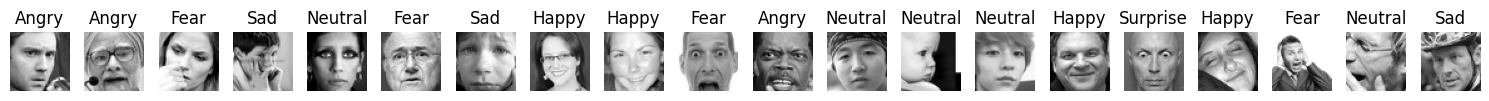

In [12]:
plt.figure(figsize=(15, 23))
for i in range(20):
    img = np.squeeze(X_train[i])  # Squeeze to remove any extra dimensions
    plt.subplot(1, 20, i + 1)
    plt.imshow(img, cmap='gray')  # Ensure grayscale display
    label = y_train[i]  # Since y_train has integer values like 3 (not one-hot encoded)
    plt.title(emotion_mapping[label])  # Map the integer label to emotion
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

In [13]:
train_datagen=ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                                 height_shift_range = 0.1, #shift the image height by 10%
                                 horizontal_flip = True, #flip the image horizontally
                                 zoom_range = 0.2) #zoom the images by 20%


valgen = ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                               height_shift_range = 0.1, #shift the image height by 10%
                               horizontal_flip = True, #shift the image height by 10%
                               zoom_range = 0.2) #zoom the images by 20%
train_datagen.fit(X_train)
valgen.fit(X_val)

In [14]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
validation_generator = valgen.flow(X_val, y_val, batch_size=64)

<function matplotlib.pyplot.show(close=None, block=None)>

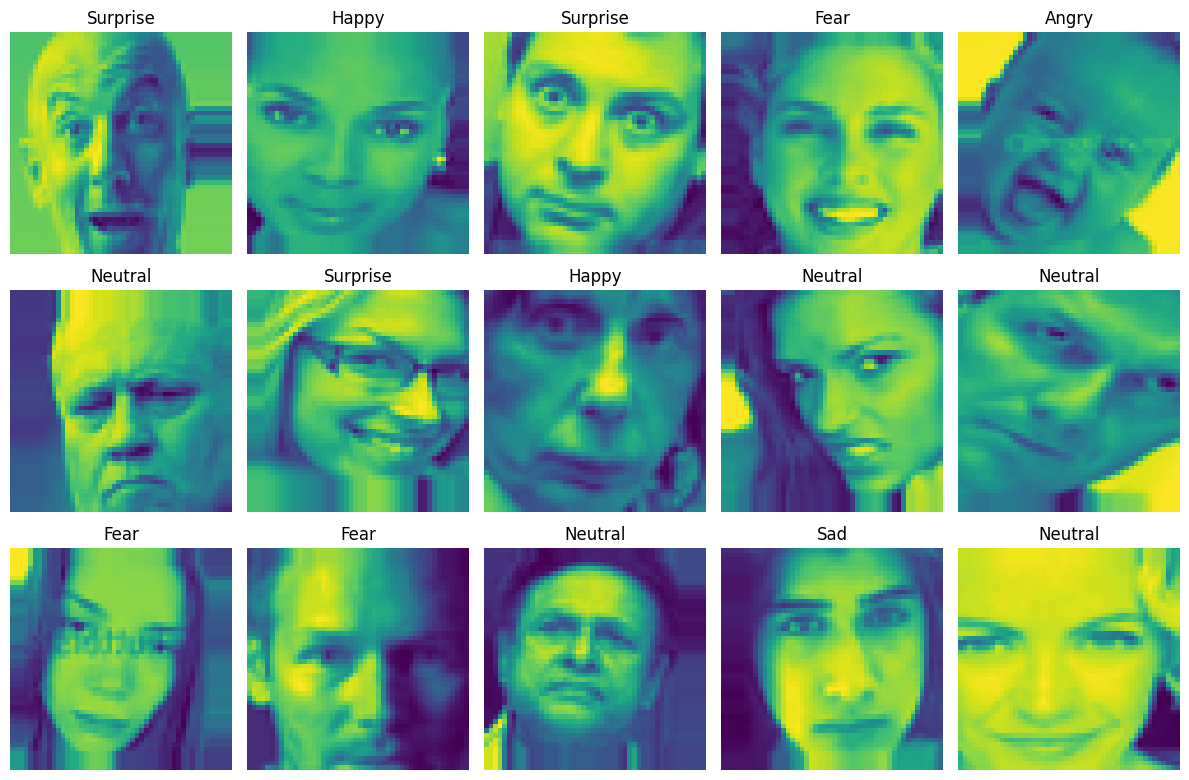

In [15]:
plt.figure(figsize=(12,8))
for i in range(0,15):
  plt.subplot(3,5,i+1)
  for X_batch , Y_batch in train_generator:
    images = X_batch[0]
    plt.imshow(images)
    index = Y_batch[i]
    plt.title(emotion_mapping[index])
    plt.axis('off') # turn off the axis numbering
    break
plt.tight_layout()
plt.show

In [18]:
from tensorflow.keras.regularizers import l2
input_shape=(48,48,1)

inputs=Input(input_shape)
x=Conv2D(64, (3,3), activation="relu", padding='same',kernel_regularizer=l2(0.01))(inputs)
x=MaxPooling2D((2,2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01))(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.01))(x)

x=Flatten()(x)
outputs=Dense(units=7,activation="linear")(x)

In [19]:
My_model=Model(inputs=inputs,outputs=outputs)

In [20]:
My_model.compile(optimizer="Adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
My_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │          16,135 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,863 (155.71 KB)

 Trainable params: 39,863 (155.71 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
My_model.fit(
    train_generator,             # Training data generator
    epochs=50,                 # Number of epochs
    
    validation_data=validation_generator,   # Validation data generator
    
)

# Evaluating the model on the test set


Epoch 1/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.3924 - loss: 1.6005 - val_accuracy: 0.3864 - val_loss: 1.6213
Epoch 2/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.3920 - loss: 1.5961 - val_accuracy: 0.3848 - val_loss: 1.5931
Epoch 3/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.3917 - loss: 1.6027 - val_accuracy: 0.3892 - val_loss: 1.6143
Epoch 4/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 43s 94ms/step - accuracy: 0.3922 - loss: 1.5987 - val_accuracy: 0.3870 - val_loss: 1.5886
Epoch 5/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.3909 - loss: 1.6014 - val_accuracy: 0.3963 - val_loss: 1.6028
Epoch 6/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.3937 - loss: 1.6016 - val_accuracy: 0.3858 - val_loss: 1.6096
Epoch 7/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.3970 - loss: 1.5885 - val_accuracy: 0.3820 - val_loss: 1.6097
Epoch 8/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.3905 - loss: 1.6035 - 

KeyboardInterrupt: 

In [1]:
X_test.shape

NameError: name 'X_test' is not defined

In [23]:
y_test.shape

(3589,)

In [24]:
y_test

32298    0
32299    5
32300    6
32301    4
32302    2
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 3589, dtype: int64

In [25]:
print(f"X_test shape is {X_test.shape} and Y_test shape is {y_test.shape}")

X_test shape is (3589, 48, 48, 1) and Y_test shape is (3589,)


In [22]:
y_pred=My_model.predict(X_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [23]:
y_pred

array([[ 6.0960591e-01, -1.6092199e+00, -2.0200199e-01, ...,
        -1.1784966e-01, -9.2630506e-01,  1.7139204e-03],
       [-2.2792608e-02, -3.0717733e+00, -3.7769717e-01, ...,
         9.7857720e-01, -1.9994806e+00,  6.2457037e-01],
       [-5.7229507e-01, -3.3456991e+00,  4.3421265e-02, ...,
        -9.4812177e-03, -8.9762157e-01, -7.2399989e-02],
       ...,
       [-2.9306209e-01, -3.3383725e+00, -2.0231269e-01, ...,
        -2.4489548e-02, -7.9774672e-01,  1.2937289e+00],
       [ 4.6930397e-01, -2.6207950e+00, -1.7991939e-01, ...,
         6.9201642e-01, -2.6035547e+00, -1.9824241e-01],
       [ 4.4763845e-01, -2.5860460e+00,  5.8322188e-02, ...,
         6.6391572e-02, -2.4894476e+00,  1.1976993e+00]], dtype=float32)

In [24]:
y_pred_probs = tf.nn.softmax(y_pred)  # Convert logits to probabilities

# Get the predicted classes by taking the argmax along the classes axis
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print the predicted classes
print("Predicted classes:", y_pred_classes)

Predicted classes: [0 4 3 ... 6 4 6]


In [25]:
correct_predictions = np.sum(y_pred_classes == y_test)

# Calculate accuracy
accuracy = correct_predictions / len(y_test)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4257


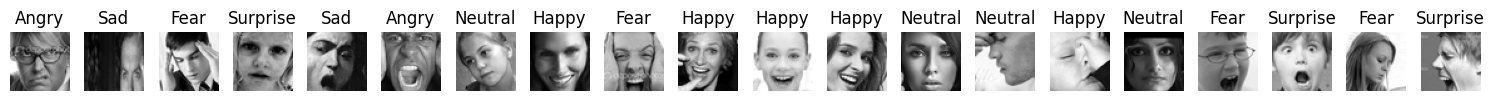

In [59]:
plt.figure(figsize=(15, 23))
for i in range(20):
    img = np.squeeze(X_test[i])  # Squeeze to remove any extra dimensions
    plt.subplot(1, 20, i + 1)
    plt.imshow(img, cmap='gray')  # Ensure grayscale display
    label = y_pred_classes[i]  # Since y_train has integer values like 3 (not one-hot encoded)
    plt.title(emotion_mapping[label])  # Map the integer label to emotion
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [12]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load VGG19 model with a custom input shape (48, 48, 3)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model's layers to avoid training them
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GAP instead of Flatten to reduce parameters
x = Dense(64, activation='relu')(x)  # Reduced number of neurons
x = Dropout(0.5)(x)
outputs = Dense(7, activation='softmax')(x)  # Adjust output size based on your classes

# Create the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary (optional)
model.summary()
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Adjust ImageDataGenerator for augmentation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True, 
    zoom_range=0.2,
    
)

valgen = ImageDataGenerator()
    

# Step 5: Use .flow() for numpy arrays (convert grayscale images to 3 channels)
# Assuming x_train, x_val, and y_train, y_val are numpy arrays

# Convert grayscale to 3 channels by repeating the grayscale data along the channel axis
x_train_rgb = np.repeat(X_train, 3, axis=-1)  # Grayscale to RGB (48, 48, 1) -> (48, 48, 3)
x_val_rgb = np.repeat(X_val, 3, axis=-1)      # Same for validation set
y_train_one_hot = to_categorical(y_train, num_classes=7)  # Assuming you have 7 emotion classes
y_val_one_hot = to_categorical(y_val, num_classes=7)

# Create the generators
train_generator = train_datagen.flow(
    x_train_rgb, y_train_one_hot,
    batch_size=80
)

validation_generator = valgen.flow(
    x_val_rgb, y_val_one_hot,
    batch_size=80
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(x_train_rgb) // 32,
    validation_data=validation_generator,
    validation_steps=len(x_val_rgb) // 32,
    epochs=100
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,057,671 (76.51 MB)

 Trainable params: 33,287 (130.03 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/100


C:\Users\Mahika\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


364/908 ━━━━━━━━━━━━━━━━━━━━ 8:10 901ms/step - accuracy: 0.2490 - loss: 1.8463

C:\Users\Mahika\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


908/908 ━━━━━━━━━━━━━━━━━━━━ 366s 400ms/step - accuracy: 0.2641 - loss: 1.8085 - val_accuracy: 0.3204 - val_loss: 1.6809
Epoch 2/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 356s 390ms/step - accuracy: 0.3047 - loss: 1.7254 - val_accuracy: 0.3467 - val_loss: 1.6458
Epoch 3/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 389s 427ms/step - accuracy: 0.3144 - loss: 1.7003 - val_accuracy: 0.3409 - val_loss: 1.6436
Epoch 4/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 379s 416ms/step - accuracy: 0.3209 - loss: 1.6957 - val_accuracy: 0.3458 - val_loss: 1.6337
Epoch 5/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 349s 383ms/step - accuracy: 0.3244 - loss: 1.6884 - val_accuracy: 0.3529 - val_loss: 1.6223
Epoch 6/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 350s 384ms/step - accuracy: 0.3281 - loss: 1.6822 - val_accuracy: 0.3492 - val_loss: 1.6197
Epoch 7/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 349s 383ms/step - accuracy: 0.3299 - loss: 1.6743 - val_accuracy: 0.3551 - val_loss: 1.6070
Epoch 8/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 351s 385ms/step - accuracy: 0.3320 - los

KeyboardInterrupt: 